## Modelos de configuração

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

O modelo de configuração constrói um grafo com uma sequencia de graus. 

O processo de construção da rede segue os próximos passos:
1. Criam-se $n$ vértices.
2. O vértice $i$ recebe $g_i$ meia-arestas.
3. Escolhem-se por acaso duas meia-arestas e são unidas para formar uma aresta no grafo final.
4. Repete-se o passo 3 até não houverem mais meia-arestas sem escolher.

Foi implementado no **networkx** uma função que cria redes usando o modelo de configuração: **configuration_model**.

**configuration_model()**: returns a random graph with the given degree sequence.

The configuration model generates a random pseudograph (graph with parallel edges and self loops) by randomly assigning edges to match the given degree sequence.

Parameters:
- deg_sequence (list of nonnegative integers): each list entry corresponds to the degree of a node.
- create_using (NetworkX graph constructor, optional (default MultiGraph)): graph type to create. 
If graph instance, then cleared before populated.
- seed (integer, random_state, or None (default)): indicator of random number generation state

**directed_configuration_model()**: returns a directed_random graph with the given degree sequences.

The configuration model generates a random directed pseudograph (graph with parallel edges and self loops) by randomly assigning edges to match the given degree sequences.

Parameters: 
- in_degree_sequence (list of nonnegative integers): each list entry corresponds to the in-degree of a node.
- out_degree_sequence - (list of nonnegative integers): each list entry corresponds to the out-degree of a node.
- create_using (NetworkX graph constructor, optional (default MultiDiGraph)): graph type to create. 
If graph instance, then cleared before populated.
- seed (integer, random_state, or None (default)): indicator of random number generation state.

### Exemplo 1

Podemos criar uma sequência seguindo uma particular distribuição através de uma função de distribuição em **random_sequence**.
 
Por exemplo, para criar uma multigrafo não direcionado com n nodes e com sequência de grau escolhidas sobre uma **power law distribuition** (distribuição de lei de potência).

In [196]:
n = 10
sequence = nx.random_powerlaw_tree_sequence(n, tries=5000)
print(sequence)
print(len(sequence))

[4, 1, 1, 2, 3, 1, 1, 1, 2, 2]
10


In [197]:
G = nx.configuration_model(sequence)
print(G.number_of_nodes())
print(G.number_of_edges())

10
9


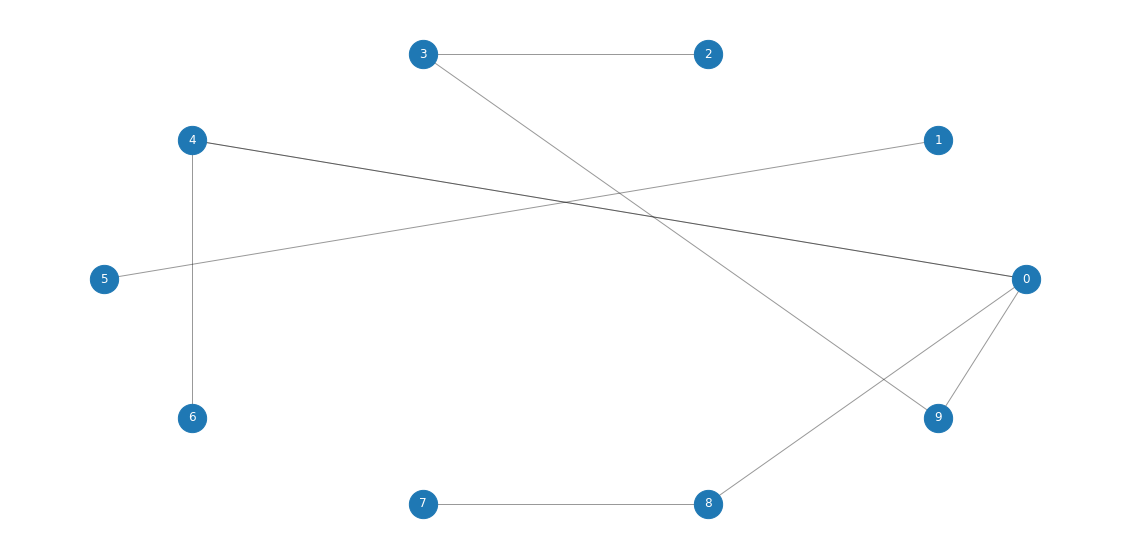

In [202]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

# layout position
pos = nx.circular_layout(G)

# draw edges
nx.draw_networkx_edges(
    G, 
    pos=pos, 
    alpha=0.4, 
    ax=ax
)

# draw nodes
nodes = nx.draw_networkx_nodes(
    G,
    node_size=800,
    pos=pos, 
    cmap=plt.cm.jet,
    ax=ax
)

# draw labels
nx.draw_networkx_labels(
    G, 
    pos=pos, 
    font_color='white', 
    ax=ax
)

plt.axis("off")
plt.show()

In [203]:
actual_degrees = [d for v, d in G.degree()]
print(actual_degrees)

[4, 1, 1, 2, 3, 1, 1, 1, 2, 2]


In [204]:
actual_degrees == sequence

True

O grafo retornado é um multigrafo, o qual pode ter arestas paralelas.
Podemos remover arestas paralelas executamos o seguinte código.

In [205]:
G = nx.Graph(G)
print(G.number_of_nodes())
print(G.number_of_edges())

10
8


Similarmente, para remover loops.

In [206]:
G.remove_edges_from(nx.selfloop_edges(G))
print(G.number_of_nodes())
print(G.number_of_edges())

10
8


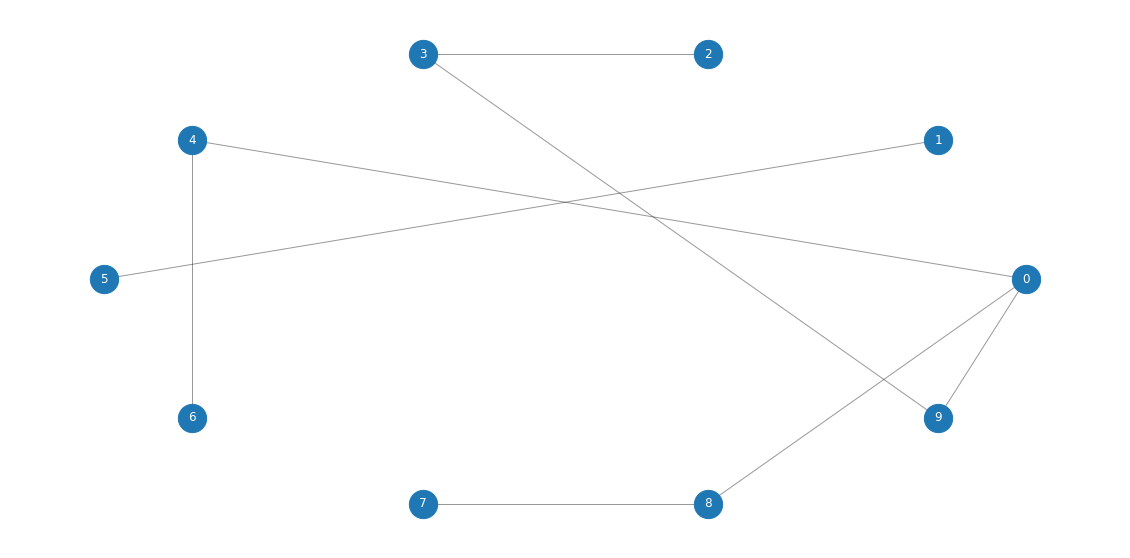

In [207]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

# layout position
pos = nx.circular_layout(G)

# draw edges
nx.draw_networkx_edges(
    G, 
    pos=pos, 
    alpha=0.4, 
    ax=ax
)

# draw nodes
nodes = nx.draw_networkx_nodes(
    G,
    node_size=800,
    pos=pos, 
    cmap=plt.cm.jet,
    ax=ax
)

# draw labels
nx.draw_networkx_labels(
    G, 
    pos=pos, 
    font_color='white', 
    ax=ax
)

plt.axis("off")
plt.show()

A seguir o calculo de algumas medidas associada ao grafo criado.

In [ ]:
# calculo coeficiente de agrupamento total 
clu = nx.average_clustering(G)
print(clu)

In [ ]:
# calculo da densidade de G
dens = nx.density(G)
print(dens)

In [ ]:
# verificanod se o grafo é conexo
print(nx.is_connected(G))

### Valores esperados dos graus

Uma alternativa ao modelo de configuração é fixar os valores esperados dos graus de cada vértice, ao invés de fixar os graus deterministicamente.

A função **expected_degree_graph()** do **networkx** usa probabilidades $p_{ij} = \frac{g_i g_j}{2m}$, onde $g_i$ é o valor esperado de grau para o vértice $i$.

**expected_degree_graph()**

expected_degree_graph(w, seed=None, selfloops=True): returns a random graph with given expected degrees.

Given a sequence of expected degrees $W=(w_0,w_1,\ldots,w_{n-1})$ of length $n$ this algorithm assigns an edge between node $u$ and node $v$ with probability

$$
p_{uv} = \frac{w_u w_v}{\sum_k w_k} .
$$

Parameters:
- w: the list of expected degrees.
- selfloops (bool (default=True)): set to False to remove the possibility of self-loop edges.
- seed (integer, random_state, or None (default)): indicator of random number generation state.

### Exemplo 4

In [209]:
n = 20
z = [10 for i in range(n)]
print(z)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [210]:
G = nx.expected_degree_graph(z)

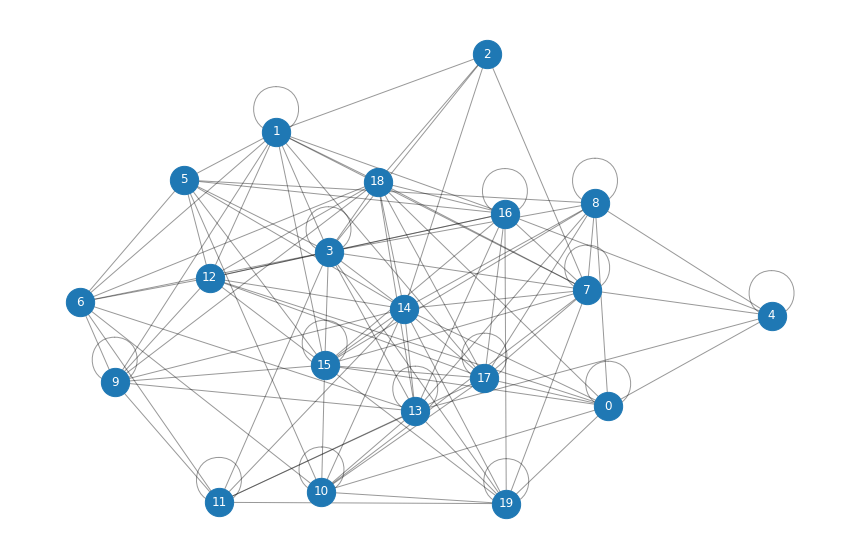

In [212]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(
    G, 
    pos=pos, 
    alpha=0.4, 
    ax=ax
)

# draw nodes
nodes = nx.draw_networkx_nodes(
    G,
    node_size=800,
    pos=pos, 
    cmap=plt.cm.jet,
    ax=ax
)

# draw labels
nx.draw_networkx_labels(
    G, 
    pos=pos, 
    font_color='white', 
    ax=ax
)

plt.axis("off")
plt.show()

In [213]:
G.degree

DegreeView({0: 11, 1: 13, 2: 5, 3: 16, 4: 7, 5: 9, 6: 9, 7: 14, 8: 11, 9: 10, 10: 11, 11: 9, 12: 11, 13: 13, 14: 15, 15: 15, 16: 13, 17: 13, 18: 12, 19: 11})